In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_excel("CW_Data.xlsx")

# 移除索引列
data = data.drop('Index', axis=1)

data

,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,3,3,45.0,21,8,4,2,10.0,0
1,2,3,3,43.0,21,4,2,8,8.0,0
2,1,4,2,26.0,24,0,0,2,0.0,0
3,2,1,3,30.0,24,4,0,0,0.0,2
4,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...
614,2,1,2,55.0,33,6,4,4,8.0,0
615,2,4,2,41.0,27,6,4,4,0.0,0
616,2,1,2,73.0,36,8,8,11,10.0,0
617,2,1,2,77.0,42,8,8,6,10.0,3


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data.drop(['Programme'], axis=1)
y = data['Programme']

pca = PCA(n_components=2)
X = StandardScaler().fit_transform(X.values)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2']).values
print(principalDf.shape)

(619, 2)


In [4]:
from sklearn.model_selection import KFold
k = 3
kf = KFold(n_splits=k)

In [5]:
# x_train, x_test, y_train, y_test = train_test_split(principalDf, y.values.tolist(), test_size=0.2)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Visualization(clf, x_train, x_test, y_train, y_test):
    # Plotting sample scatter plot
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # Plotting decision boundary, selecting minimum and maximum values
    x_min = x_train[:, 0].min()
    x_max = x_train[:, 0].max()
    y_min = x_train[:, 1].min()
    y_max = x_train[:, 1].max()
    # Generating grid matrix
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    # Calculating the predicted class for each grid point
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    # Reshaping the predicted class to match the grid shape
    Z = Z.reshape(XX.shape)
    # Plotting the decision regions
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    # Plotting the test set scatter plot
    plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Paired,
                edgecolor='k', s=10)
    plt.title('Accuracy:{}'.format(clf.score(x_test, y_test)))

In [7]:
# Using a polynomial kernel function for model training, degree: the degree of the polynomial
from sklearn import svm
def best(x_train, y_train, x_test, y_test):
    scores = []  # List to store accuracy scores for different degree values
    # Using a for loop to iteratively select degree values in the range [1,15) for model training and testing evaluation
    for i in range(1, 10):
        clf = svm.SVC(kernel='poly', degree=i, coef0=1, C=5)  # Kernel type is polynomial, selecting different degree values
        clf.fit(x_train, y_train)  # Training using the training set
        score = clf.score(x_test, y_test)  # Evaluating using classification accuracy
        scores.append(score)  # Storing the accuracy score in the list
        print('the accuracy_score is ', score)  # Viewing the score for different degrees
    best_degree = scores.index(np.max(scores)) + 1  # Finding the optimal degree value through the index of the maximum value
    print('the best degree is ', best_degree)  # Viewing the optimal degree value
    return best_degree

# best_degree = best(x_train, y_train, x_test, y_test)

In [12]:
from sklearn import svm
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf_rbf = svm.SVC(kernel='rbf', degree=1, coef0=1, C=5)
    clf_rbf.fit(x_train, y_train)

    y_pred = clf_rbf.predict(x_test)

    score = clf_rbf.score(x_test, y_test)
    scores.append(score)
print(scores)

[0.48792270531400966, 0.6116504854368932, 0.6067961165048543]


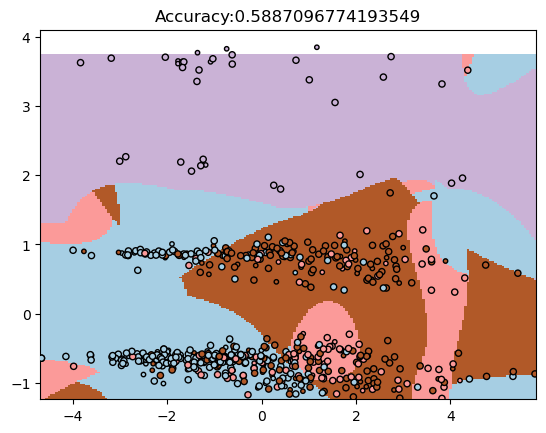

In [14]:
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(principalDf, y.values.tolist(), test_size=0.2)
clf_poly = svm.SVC(kernel='poly', degree=7, coef0=1, C=5)
clf_poly.fit(x_train, y_train)
Visualization(clf_poly, x_train, x_test, y_train, y_test)

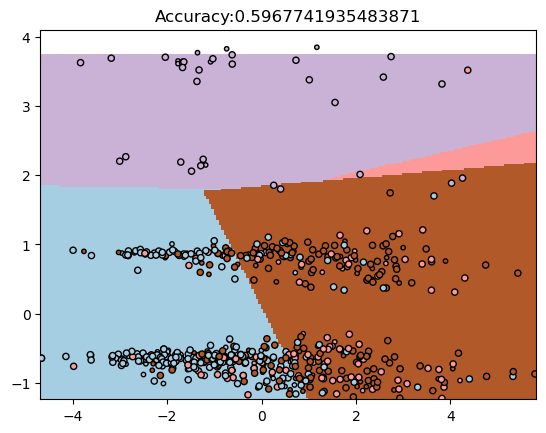

In [15]:
from sklearn import svm
clf_linear = svm.SVC(kernel='linear', C=0.1)
clf_linear.fit(x_train, y_train)
Visualization(clf_linear, x_train, x_test, y_train, y_test)